<table>
<thead>
  <tr>
    <td></td>
    <td>
        Kinga Węzka <br>
        kinga.wezka@pw.edu.pl <br>
        Warsaw University of Technology  <br>
Faculty Geodesy and Cartography <br>
<a ref="https://www.google.com/maps/place/Gmach+G%C5%82%C3%B3wny+Politechniki+Warszawskiej/@52.220656,21.0094422,19z/data=!3m1!4b1!4m5!3m4!1s0x471ecce951c85a19:0x712b0e1503c42b91!8m2!3d52.220656!4d21.0099894"> N 52&ordm; 12' 45&quot; / E 21&ordm; 03' 51&quot;</a>
    </td>
    <td>
<a rel="license" href="https://www.pw.edu.pl"><img alt="Politechnika Warszawska" style="border-width:0" src="https://www.pw.edu.pl/design/pw/images/znak-pw.png" width="50%" /></a>
    </td>
  </tr>
</thead>
</table>

<div class="alert alert-block alert-success">
<b> Temat: </b> 
    Geometria obliczeniowa - pole powierzchni wieloboku (poligonu)
</div>

In [ ]:
1. [Interpolacja liniowa](#zad1)
    1. [Zadanie](#zad1a)
    2. [Dane](#zad1b)
2. [Interpolacja dwuliniowa](#zad2)
    1. [Zadanie](#zad2a)
    2. [Dane](#zad2b)

<div class="alert alert-block alert-info">
<b>Temat:</b> 
    Wzór na obliczanie pola powierzchni wieloboku (poligonu) - metoda Gausa
    
    Metoda Gausa jest metodą analityczną do wyznaczenia pola wieloboku potrzebujemy:
    + 1) współrzędnych kartezjańskich wierzchołków wieloboku 
    + 2) współrzędnych biegunowych (kąt/kierunek, odległość)
</div>


In [ ]:
# importowanie bibliotek i konfiguracj matplotlib 
import numpy as np
from numpy.linalg import inv
from math import pi, sin, cos, sqrt, exp
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
from matplotlib.patches import Polygon
import matplotlib as mpl
mpl.rcParams['lines.linewidth'] = 1
mpl.rcParams['lines.linestyle'] = '-.'
mpl.rcParams['xtick.labelsize'] = 11
mpl.rcParams['ytick.labelsize'] = 11
mpl.rcParams['axes.titlesize'] = 11
mpl.rcParams['axes.labelsize'] = 11
mpl.rcParams['axes.grid'] = True
mpl.rcParams['lines.markersize'] ** 2. # marker size in scatter

# Wyświetlanie wykresów
%matplotlib inline # metoda magiczna do wyświetlania wykresów statyczny w komórce
#%matplotlib notebook # metoda magiczna do wyświetlania wykresów interaktywnych,

### 1)  Pole powierzchni na podstawie współrzędnych kartezjańskich

**Algorytm powierzchni Gaussa** (lub inaczej algorytm sznurowadła lub metoda sznurowadła) to algorytm matematyczny do wyznaczania powierzchni prostego wielokąta, którego wierzchołki są opisane przez kartezjańskie współrzędne w płaszczyźnie tego wielokata. Nazywa się to wzorem na sznurowadła ze względu na stałe mnożenie krzyżowe dla współrzędnych tworzących wielokąt, podobnie jak wiązanie sznurowadeł.
https://en.wikipedia.org/wiki/Shoelace_formula


Jak obliczyć pole powierzchni prostego (nie przecinającego się) wieloboku (**poligonu**), o **$n$** bokach o znanych współrzędnych kartezjańskich w płaszczyźnie dla wszystkich jego wierzchołków (ang. *vertices*)?

Mając dany wielokąt **z dodatnio zorientowaną (w kierunku zgodnym z ruchem wskazówek zegara) sekwencją punktów** $P_{i}=(x_{i},y_{i}),i=1,\dots ,n$ w kartezjańskim układzie współrzędnych - dla uproszczenia poniższych formuł wygodnie jest to zapisać jako: $P_{0}=P_{n}, P_{n+1}=P_{1}$

Główną koncepcją metody jest podzielenie głównego wielokąta na **$n$** trapezów i krzyżowe pomnożenie odpowiednich współrzędnych w celu znalezienia obszaru otaczającego wielokąt (trapezoidy zielone) i odjęcie od niego otaczających trapezów (czerwony), aby znaleźć obszar wielokąta wewnątrz. 


<a rel="license" href="https://www.thecivilengineer.org/"><img alt="Gauss's Area Calculation Formula" style="border-width:0" src="https://www.thecivilengineer.org/images/stories/gauss_area_anim.gif" width="50%" /></a>

**Prametry znane**: Współrzędne kartezjańskie wszystkich wierzchołków $(x1, y1), (x2, y2), ... (xn, yn)$.





 1. Odejmij otaczające trapezy (czerwony) od otaczających trapezów (zielony).
 
Formuła trapezu podsumowuje sekwencję obszarów zorientowanych $$ A_{i}={\tfrac {1}{2}}(y_{i}+y_{i+1})(x_{i}-x_{i+1})$$ trapezów z $$P_{i}P_{i+1}$$ jako jedną z czterech krawędzi (patrz poniżej):

$$\begin{aligned}A&={\frac {1}{2}}\sum _{i=1}^{n}(y_{i}+y_{i+1})(x_{i}-x_{i+1})\\&={\frac {1}{2}}{\Big (}(y_{1}+y_{2})(x_{1}-x_{2})+\cdots +(y_{n}+y_{\color {red}1})(x_{n}-x_{\color {red}1}){\Big )}\end{aligned}$$

$$\begin{aligned}A&={\frac {1}{2}}\sum _{i=1}^{n}(y_{i}+y_{i+1})(x_{i}-x_{i+1})\\&={\frac {1}{2}}{\Big (}(y_{1}+y_{2})(x_{1}-x_{2})+\cdots +(y_{n}+y_{\color {red}1})(x_{n}-x_{\color {red}1}){\Big )}\end{aligned}$$


 2. Pole Powierzchni wieloboku na podstawie wzorów Gaussa obliczamy (z obu wzorów wynik powienin być taki sam, więc drugi wzór może stanowić kontrolę)

$$-2A = \sum_{i=1}^{n} (x_{i+1}  - x_{i-1}) \cdot y_i $$
$$2A = \sum_{i=1}^{n} (y_{i+1}  - y_{i-1}) \cdot x_i $$

gdzie: 
+ A - pole powierzchni poligonu;
+ n - liczba wierzchołków polygonu,
+ xi, yi, - kartezjańskie współrzędnymi wierzchołków wielokąta

Jeśli wierzchołki są numerowane zgodnie z ruchem wskazówek zegara, wyznaczniki powyższych wyrażeń są dodatnie, natomiast jeśli są numerowane przeciwnie do ruchu wskazówek zegara, są ujemne, w takim przypadku należy wziąć pod uwagę wartości bezwzględne.

Dodatkową kontrolą jest sprawdzenie, czy:
$$\sum_{i=1}^{n} (x_{i+1}  - x_{i-1}) = 0 $$
$$\sum_{i=1}^{n} (x_{i+1}  - x_{i-1}) = 0 $$

36.0

**Dane** współrzędne wierzchołków wielokoąta:

In [3]:
pts = np.array([[2,2], [6,6], [3,5]])
pts1 = np.array([[2,2], [2,6], [5,6], [5,2]])
pts2 = np.array(([[4, 0], [2, 4], [-2, 4], [-4, 0], [-2, -4], [2, -4]])) # pole 48
pts3 = np.array(([[0, 0], [2, 4], [-2, 4], [-4, 0], [-2, -4], [2, -4]])) # pole 48
pts4 = np.array(([[1, 6], [3, 1], [7, 2], [4, 4], [8,5]])) # pole 16.5

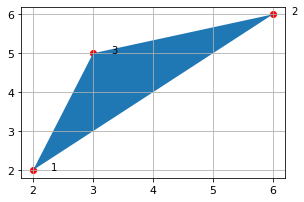

In [7]:
# convert cm > cal: 1cal = 2.54 cm 
xx = 12/2.54; yy = 8/2.54

fig, ax =  plt.subplots(nrows=1, ncols=1, figsize=(xx, yy))

i =1
for xy in pts:
    ax.scatter(xy[0], xy[1],  marker = 'o', color = 'red')
    ax.text(xy[0]+0.3, xy[1], str(i))
    i+=1
    
p = Polygon(pts, closed=True)
ax = plt.gca()
ax.add_patch(p)
#ax.set_xlim(-5,5)
#ax.set_ylim(-5,5)
plt.show()
fig.savefig('poligon.png', format='png', pad_inches=0.01, dpi=72)

In [19]:
def polygon_area(poly):
    """
    Return the area of any polygon
    """
    pa = 0
    for i in range(len(poly)):
        if i == len(poly)-1:
            pa += (poly[i][0] * poly[0][1]) - (poly[i][1] * poly[0][0])
        else: 
            pa += (poly[i][0] * poly[i+1][1]) - (poly[i][1] * poly[i+1][0])
    return pa/2

polygon_area(list(pts))

16.5

In [108]:
def polygon_area(poly):
    """
    Return the area of any polygon
    """
    pa = 0
    for i in range(len(poly)):
        if i == len(poly)-1:
            pa += (poly[i][0] + poly[0][0]) * (poly[i][1] - poly[0][1])
        else: 
            pa += (poly[i][0] + poly[i+1][0]) * (poly[i][1] - poly[i+1][1])
    return -pa/2

polygon_area(list(pts))

16.5

### 1)  Pole powierzchni na podstawie współrzednych biegunowych

Pole wieloboku można wyznaczyć na podstawie współrzdnych biegunowych wierzchołków danego wieloboku. Znane współrzędne biegunowe $r, \alpha$ reprezentują miary liniow (odległość) kątowe (kierunek) pomierzone tachimetrem . Do wyznaczenia pola powierzchni wzorami Gaussa musimy znać współrzędne punktów załamania konturu wieloboku.

$$2P = \sum_{i=1}^{n} r_{i}  \cdot r_{i+1} \cdot \sin (\alpha_{i+1} - \alpha_{i}) $$


<img src="geo_geometria_obliczeniowa_gauss.png" alt="Drawing" style="width: 300px;"/>

#### Przykład numeryczny:


| Nr. pkt. | $$\alpha$$ |  $r$| $$\alpha_{k+1} - \alpha_{k}$$ | $$r, r_{k+1}$$ | $$sin(\alpha_{k+1} - \alpha_{k})$$ |
|----------|---------:|------:|-----------------------------|------------|----------------------------------|
| 1        | 41s11m   | 106.3 | 10s56m                      | 12118.20   | 0.18967                          |
| 2        | 52s07m   | 114.0 | 06s55m                      | 13292.40   | 0.12043                          |
| 3        | 59s02m   | 116.6 | 04s24m                      | 10424.04   | 0.07672                          |
| 4        | 63s26m   | 89.4  | -18s26m                     | 7590.06    | -0.31620                         |
| 5        | 45s00m   | 84.9  | -03s49m                     | 9024.87    | -0.06656                         |
| 1        |          |       | suma = 0                    |            |                                  |

$2P = 1698.32$

$ P= 849.16$ m$^2$

In [15]:
from math import radians, sin

def st(s, m):
    return s + m/60.
    
wsp = [[st(41, 11), 106.3], 
       [st(52, 7), 114.0],  
       [st(59, 2), 116.6], 
       [st(63,26), 89.4], 
       [st(45, 0), 84.9]]


suma = 0
for i in range(0, len(wsp)):
    if i == len(wsp)-1: #ostatni
        print(i, wsp[i])
        suma += ((wsp[i][1] * wsp[0][1]) * (sin(radians(wsp[0][0] - wsp[i][0]))) )
    else: 
        print("*", i, wsp[i])
        suma += ((wsp[i][1] * wsp[i+1][1]) * (sin(radians(wsp[i+1][0] - wsp[i][0]))) )

p = suma/2
print(f"Pole = {p:.2f}")

* 0 [41.18333333333333, 106.3]
* 1 [52.11666666666667, 114.0]
* 2 [59.03333333333333, 116.6]
* 3 [63.43333333333333, 89.4]
4 [45.0, 84.9]
Pole = 849.08
